In [ ]:
# Importing the necessary packages

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import transforms, datasets
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Setting the device to be used as GPU

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Gathering the CIFAR-10 dataset

In [ ]:
#Loading the CIFAR-10 dataset
train_transform = transforms.Compose([transforms.RandomCrop(32, padding=4),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))]);

test_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))]);

train_data = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=train_transform)
test_data = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=test_transform)

100%|██████████| 170498071/170498071 [00:02<00:00, 58177907.22it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
print(train_data)
print(test_data)

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               RandomCrop(size=(32, 32), padding=4)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.201))
           )
Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.201))
           )


In [ ]:
# Combining the dataset and the sampler and creating an iterator to move over the datasets

cifar_train_loader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
cifar_test_loader = torch.utils.data.DataLoader(test_data, batch_size=64, shuffle=False)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

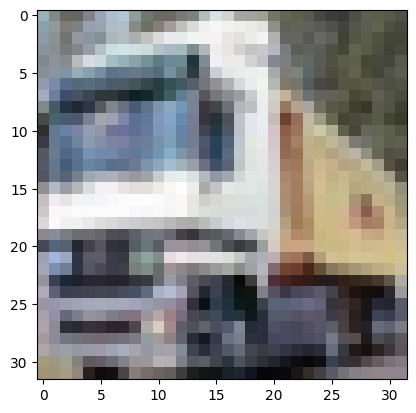

truck
9


In [ ]:
# Printing the first image from the training data

plt.imshow(train_data.data[1], cmap='gray')
plt.show()
print(train_data.classes[9])
print(train_data.targets[1])

# Building the base CNN classification model

In [ ]:
# Defining the CNN model for classifying the digits in the MNIST dataset

class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()

    # First convolutional layer
    self.conv_1 = nn.Sequential(nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1),
                  nn.ReLU(),
                  nn.MaxPool2d(kernel_size = 2, stride=2))

    # Second convolutional layer
    self.conv_2 = nn.Sequential(nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1),
                  nn.ReLU(),
                  nn.MaxPool2d(kernel_size = 2, stride=2))

    # Final classification layer with 10 classification classes
    self.fc = nn.Linear(32 * 8 * 8, 10)

  def forward(self,x):
    x = self.conv_1(x)
    x = self.conv_2(x)

    # Flattening the output of the previous layer to the feature size of the last layer
    x = x.view(x.size(0), -1)
    output = self.fc(x)
    return output

model=CNN()

In [ ]:
# Instantiating the model

cnn_model = CNN()
print(cnn_model)

CNN(
  (conv_1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Linear(in_features=2048, out_features=10, bias=True)
)


In [ ]:
# Setting up the loss function for optimization

loss = nn.CrossEntropyLoss()

In [ ]:
# Setting up the optimizer

optimizer = optim.Adam(cnn_model.parameters(), lr = 0.005)

# Training the base CNN model

In [ ]:
# Defining the training function

def train(num_of_epochs, loss_func, train_loader):

  for epoch in range(num_of_epochs):

    cnn_model.train()
    running_loss = 0.0

    for data in train_loader:

      # Gathering the inputs and labels in this step
      inputs,labels = data

      # Clearing the gradients for each step
      optimizer.zero_grad()

      # Sending the inputs through the model
      outputs = cnn_model(inputs)

      # Running the loss fuction
      loss = loss_func(outputs, labels)

      # Computing the gardients and doing back-propogation
      loss.backward()

      # Applying the gradients by using Adams Optimizer which has enhanced Gradient descent
      optimizer.step()

      # Adding the loss to the total per epoch
      running_loss+=loss.item()

    print(f'Epoch {epoch+1}, Loss:{running_loss/len(train_loader)}')

  print('Finished Training')

In [ ]:
# Starting the training for CIFAR-10

train(30, loss, cifar_train_loader)

Epoch 1, Loss:1.695604528917376
Epoch 2, Loss:1.5201141921150716
Epoch 3, Loss:1.4625003734208128
Epoch 4, Loss:1.4317522308100825
Epoch 5, Loss:1.3832810274170488
Epoch 6, Loss:1.3550962856815905
Epoch 7, Loss:1.3398257647176532
Epoch 8, Loss:1.3302719718812372
Epoch 9, Loss:1.316714463407731
Epoch 10, Loss:1.3236776809863118
Epoch 11, Loss:1.3135976513176013
Epoch 12, Loss:1.3096441681427724
Epoch 13, Loss:1.3022154758653373
Epoch 14, Loss:1.295859048738504
Epoch 15, Loss:1.2919492038619487
Epoch 16, Loss:1.2848158991702683
Epoch 17, Loss:1.278985815279929
Epoch 18, Loss:1.2755501309166783
Epoch 19, Loss:1.2648003852123495
Epoch 20, Loss:1.2618314071232095
Epoch 21, Loss:1.2578544560295846
Epoch 22, Loss:1.2472049521515742
Epoch 23, Loss:1.2541081684324749
Epoch 24, Loss:1.2442213150546373
Epoch 25, Loss:1.2422418944213702
Epoch 26, Loss:1.2406853272024627
Epoch 27, Loss:1.2342025322834853
Epoch 28, Loss:1.2368432981583772
Epoch 29, Loss:1.2340631036807204
Epoch 30, Loss:1.2259695334

# Evaluating the base CNN model

In [ ]:
# Evaluating the test time accuracy

cnn_model.eval()
num_correct = 0
num_total = 0

with torch.no_grad():

  for data in cifar_test_loader:

    inputs,labels = data

    # Running the inputs through the model
    outputs = cnn_model(inputs)

    # Making the prediction based on highest confidence
    _,predicted=torch.max(outputs.data,1)

    # Updating the counters
    num_total += labels.size(0)
    num_correct += (predicted==labels).sum().item()

print(f'Accuracy on the test dataset:{100 * num_correct / num_total}%')

Accuracy on the test dataset:60.91%


# Generating adversarial examples using iterative FGSM

In [ ]:
# Function to generate adversarial examples using IFGSM
def ifgsm_attack(image, epsilon, data_grad, iterations):

    # Collect the element-wise sign of the data gradient
    sign_data_grad = data_grad.sign()

    perturbed_image = image

    # Creating the perturbations iteratively
    for i in range(iterations):
        perturbed_image = perturbed_image + epsilon * sign_data_grad
        # Ensure the perturbed image values are within the valid range [0, 1]
        perturbed_image = torch.clamp(perturbed_image, 0, 1)

    return perturbed_image

# Testing the model on adversarial examples

In [ ]:
def visualize_perturbations(original_image, original_label, perturbed_image, perturbed_label):
    perturbation = perturbed_image - original_image
    print(perturbation.size())

    plt.figure(figsize=(8, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(np.transpose(original_image.squeeze().cpu().detach().numpy(), (1, 2, 0)))
    plt.title('Original Image Label - ' + str(train_data.classes[original_label.item()]))
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(np.transpose(perturbation.squeeze().cpu().detach().numpy(), (1, 2, 0)))  # Adjust the colormap if needed
    plt.title('Perturbation')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(np.transpose(perturbed_image.squeeze().cpu().detach().numpy(), (1, 2, 0)))
    plt.title('Perturbed Image Label - ' + str(train_data.classes[perturbed_label.item()]))
    plt.axis('off')

    plt.show()

In [ ]:
# Function to visualize the original and perturbed images
def visualize_adversarial_examples(original_image, original_label, perturbed_image, perturbed_label):
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(np.transpose(original_image.squeeze().detach().cpu().numpy(), (1, 2, 0)))
    plt.title('Original Image Label - ' + str(train_data.classes[original_label.item()]))
    plt.subplot(1, 2, 2)
    plt.imshow(np.transpose(perturbed_image.squeeze().detach().cpu().numpy(), (1, 2, 0)))
    plt.title('Adversarial Example Label - ' + str(train_data.classes[perturbed_label.item()]))
    plt.show()

# Testing the model on adversarial examples

In [ ]:
# Function to test the model on adversarial examples
def test_model_on_adversarial(model, loss_func, test_loader, epsilon):
    model.eval()
    correct = 0
    total = 0
    num_of_printed = 0
    iterations = 30

    for data in test_loader:

        inputs, labels = data
        # inputs, labels = inputs.to(device), labels.to(device)
        inputs.requires_grad = True  # Enable gradient computation for the input

        outputs = model(inputs)
        loss = loss_func(outputs, labels)
        model.zero_grad()

        # Calculate gradients of the loss with respect to the input
        loss.backward()
        data_grad = inputs.grad

        # Generate adversarial examples using FGSM
        perturbed_inputs = ifgsm_attack(inputs, epsilon, data_grad, iterations)

        # Evaluate the model on the perturbed inputs
        outputs = model(perturbed_inputs)
        _, predicted = torch.max(outputs, 1)

        # Visualize the original and perturbed images (optional)
        random_image = np.random.randint(15)
        if predicted[random_image] != labels[random_image] and num_of_printed == 0:
            # visualize_adversarial_examples(inputs[random_image], labels[random_image], perturbed_inputs[random_image], predicted[random_image])
            visualize_perturbations(inputs[random_image], labels[random_image], perturbed_inputs[random_image], predicted[random_image])
            num_of_printed += 1

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Accuracy on the test dataset with epsilon={epsilon}: {accuracy}%')



Testing with epsilon=1e-05
torch.Size([3, 32, 32])


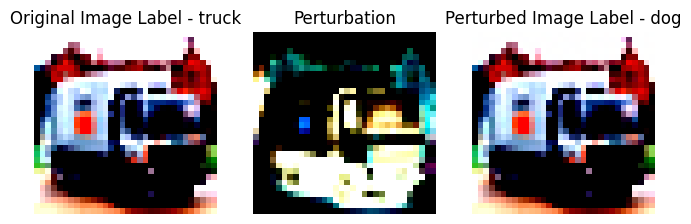

Accuracy on the test dataset with epsilon=1e-05: 21.62%

Testing with epsilon=0.0001
torch.Size([3, 32, 32])


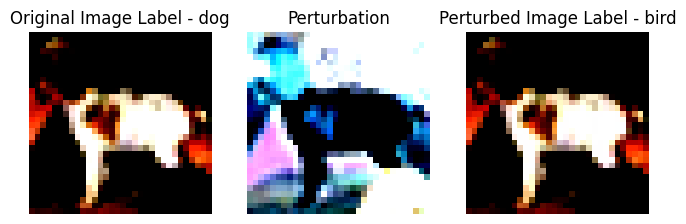

Accuracy on the test dataset with epsilon=0.0001: 21.15%

Testing with epsilon=0.001


torch.Size([3, 32, 32])


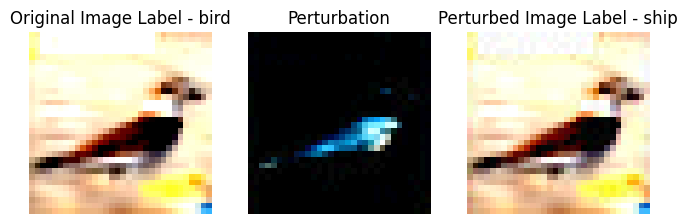

Accuracy on the test dataset with epsilon=0.001: 18.04%

Testing with epsilon=0.01
torch.Size([3, 32, 32])


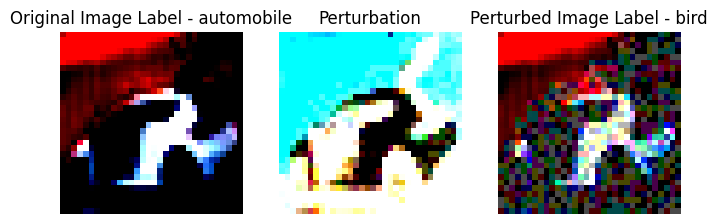

Accuracy on the test dataset with epsilon=0.01: 5.85%

Testing with epsilon=0.05
torch.Size([3, 32, 32])


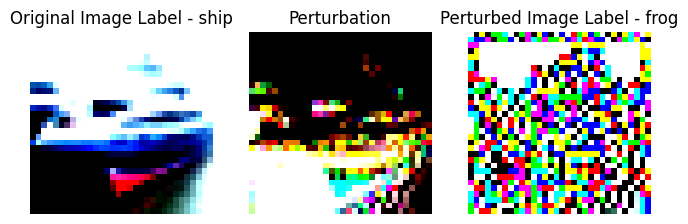

Accuracy on the test dataset with epsilon=0.05: 10.35%

Testing with epsilon=0.1
torch.Size([3, 32, 32])


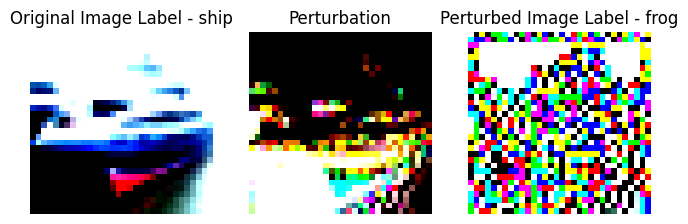

Accuracy on the test dataset with epsilon=0.1: 10.35%

Testing with epsilon=0.15
torch.Size([3, 32, 32])


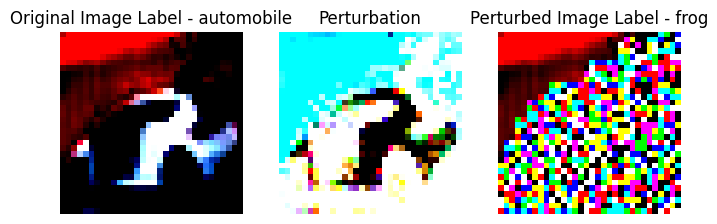

Accuracy on the test dataset with epsilon=0.15: 10.35%

Testing with epsilon=0.2
torch.Size([3, 32, 32])


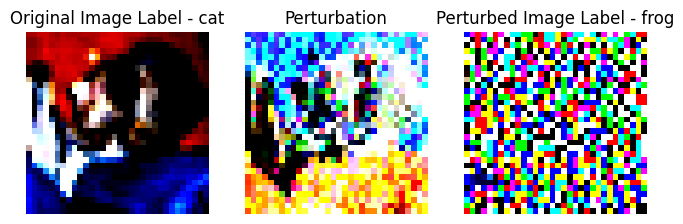

Accuracy on the test dataset with epsilon=0.2: 10.35%

Testing with epsilon=0.25
torch.Size([3, 32, 32])


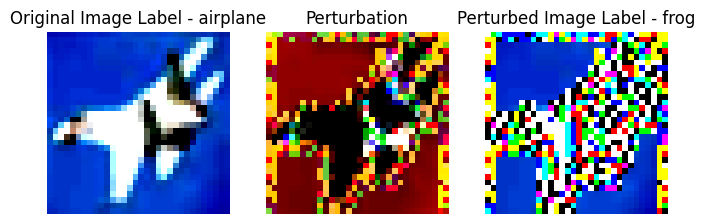

Accuracy on the test dataset with epsilon=0.25: 10.35%


In [ ]:
# Generate and test adversarial examples with different epsilon values
epsilons = [0.00001, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.15, 0.2, 0.25]

for epsilon in epsilons:
    print(f"\nTesting with epsilon={epsilon}")
    test_model_on_adversarial(cnn_model,loss, cifar_test_loader, epsilon)